In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential,load_model
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
output_folder = "CNN_Model_Output"
file = "Combined_Viral_Data.csv"

# Define a dictionary to map folder names to disease names and labels
disease_mapping = {
    "HBV": {"disease": "HBV", "label": 0},
    "INFLUENZA": {"disease": "Influenza", "label": 1},
    "HCV": {"disease": "HCV", "label": 2},
    "DENGUE": {"disease": "Dengue", "label": 3}
}

# Load the data
data = pd.read_csv(file)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

# Prepare data for training
X = np.array(data['DNA'])
y = np.array(data['Label'])

print(len(X))

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def pad_sequences(sequences, max_length):
    padded_sequences = []
    for sequence in sequences:
        if len(sequence) < max_length:
            padded_sequence = sequence + 'N' * (max_length - len(sequence))
        else:
            padded_sequence = sequence[:max_length]
        padded_sequences.append(padded_sequence)
    return padded_sequences

max_length = 11195

X_train_padded = pad_sequences(X_train, max_length)
X_test_padded = pad_sequences(X_test, max_length)


14700


In [3]:
# One-hot encoding for DNA sequences
def one_hot_encoding(seq):
    base_dict = {'A': [1, 0, 0, 0], 'T': [0, 1, 0, 0], 'C': [0, 0, 1, 0], 'G': [0, 0, 0, 1], 'N': [0, 0, 0, 0]}
    return np.array([base_dict.get(base, [0, 0, 0, 0]) for base in seq])

X_train_encoded = np.array([one_hot_encoding(seq) for seq in X_train_padded])
X_test_encoded = np.array([one_hot_encoding(seq) for seq in X_test_padded])


In [4]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(11195,4)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_encoded, y_train, epochs=1, batch_size=32, validation_split=0.2)

# Evaluate the model
evaluation = model.evaluate(X_test_encoded, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Generate and print confusion matrix
y_pred = np.argmax(model.predict(X_test_encoded), axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Save the model
model.save(os.path.join(output_folder, "cnn_model_all.h5"))


92/92 [==============================] - 20s 215ms/step - loss: 0.0048 - accuracy: 0.9990
Test Loss: 0.004757214337587357
Test Accuracy: 0.9989795684814453
92/92 [==============================] - 20s 214ms/step
Confusion Matrix:
[[1353    1    0    0]
 [   0  626    0    0]
 [   0    0  157    0]
 [   0    2    0  801]]


In [4]:
# Define the CNN model
model = Sequential()

# Convolutional layer with 7 filters, kernel size of 21, and ReLU activation function
model.add(Conv1D(7, 21, activation='relu', input_shape=(11195, 4)))

# Max pooling layer with pool size of 1000
model.add(MaxPooling1D(1000))

# Flatten layer to convert features into a one-dimensional array
model.add(Flatten())

# Output layer with 4 neurons (for 4 classes) and softmax activation function for classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_encoded, y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
294/294 [==============================] - 48s 151ms/step - loss: 0.3009 - accuracy: 0.9281 - val_loss: 0.0721 - val_accuracy: 0.9919
Epoch 2/2
294/294 [==============================] - 40s 135ms/step - loss: 0.0576 - accuracy: 0.9911 - val_loss: 0.0462 - val_accuracy: 0.9919


In [5]:
# Train the model
model.fit(X_train_encoded, y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
294/294 [==============================] - 39s 134ms/step - loss: 0.0416 - accuracy: 0.9914 - val_loss: 0.0338 - val_accuracy: 0.9911
Epoch 2/2
294/294 [==============================] - 38s 131ms/step - loss: 0.0311 - accuracy: 0.9919 - val_loss: 0.0253 - val_accuracy: 0.9923


In [6]:
# Evaluate the model
evaluation = model.evaluate(X_train_encoded, y_train)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Generate and print confusion matrix
y_pred = np.argmax(model.predict(X_train_encoded), axis=-1)
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

368/368 [==============================] - 14s 37ms/step - loss: 0.0263 - accuracy: 0.9922
Test Loss: 0.026271091774106026
Test Accuracy: 0.99217689037323
368/368 [==============================] - 15s 39ms/step
Confusion Matrix:
[[5490   22    0    0]
 [   0 2382    0    0]
 [   0    0  608    0]
 [   0   70    0 3188]]


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11175, 7)          595       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 7)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 77)                0         
                                                                 
 dense (Dense)               (None, 4)                 312       
                                                                 
Total params: 907
Trainable params: 907
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Define the CNN model
model = Sequential()

# Convolutional layer with 7 filters, kernel size of 21, and ReLU activation function
model.add(Conv1D(4, 21, activation='relu', input_shape=(11195, 4)))

# Max pooling layer with pool size of 1000
model.add(MaxPooling1D(500))

# Flatten layer to convert features into a one-dimensional array
model.add(Flatten())

# Output layer with 4 neurons (for 4 classes) and softmax activation function for classification
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_encoded, y_train, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
294/294 [==============================] - 40s 133ms/step - loss: 0.4102 - accuracy: 0.8679 - val_loss: 0.0858 - val_accuracy: 0.9936
Epoch 2/2
294/294 [==============================] - 38s 128ms/step - loss: 0.0608 - accuracy: 0.9925 - val_loss: 0.0480 - val_accuracy: 0.9936


In [14]:
# Evaluate the model
evaluation = model.evaluate(X_train_encoded, y_train)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Generate and print confusion matrix
y_pred = np.argmax(model.predict(X_train_encoded), axis=-1)
conf_matrix = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

368/368 [==============================] - 13s 36ms/step - loss: 0.0478 - accuracy: 0.9925
Test Loss: 0.04781043156981468
Test Accuracy: 0.9925169944763184
368/368 [==============================] - 14s 36ms/step
Confusion Matrix:
[[5496   16    0    0]
 [   1 2381    0    0]
 [   0    0  607    1]
 [   0   70    0 3188]]


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 11175, 4)          340       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 22, 4)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 88)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 356       
                                                                 
Total params: 696
Trainable params: 696
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 184ms/step


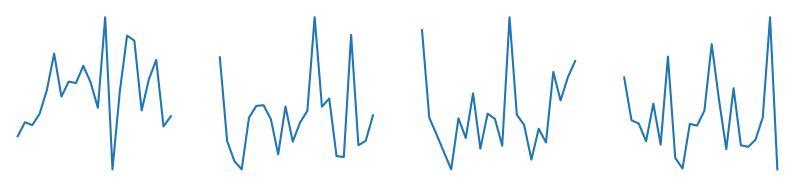

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model

# Create a new model to extract the activations of convolutional layers
activation_model = Model(inputs=model.input, outputs=model.layers[1].output)

# Get the activations for a sample input
sample_input = X_train_encoded[0:1]  # Assuming X_train_encoded is your input data
activations = activation_model.predict(sample_input)

# Visualize the activations of the first convolutional layer
plt.figure(figsize=(10, 10))
for i in range(activations.shape[-1]):
    plt.subplot(4, 4, i + 1)
    plt.plot(activations[0, :, i])  # Plot the activation values instead of using imshow
    plt.axis('off')
plt.show()

In [ ]:
# Virus-Min. length-Max. length
# HCV-5967-10320
# Influenza-508-2373
# Dengue-1485-11195
# HBV-1467-4224

In [69]:
# Loop through samples for each class
for label, indices in class_samples.items():
    disease_info = next((key for key, value in disease_mapping.items() if value["label"] == label), None)
    disease_name = disease_mapping[disease_info]['disease']
    print(f"Disease: {disease_name}")
    for i in range(min(num_samples_per_class, len(indices))):
        # Get the feature maps for the i-th sample of the current class
        test_sample = X_test_encoded[indices[i]]
        test_feature_maps = get_feature_maps(model, layer_name, test_sample)
        
        # Print the feature maps
        print(f"Sample {i+1} Feature Maps:")
        for j in range(test_feature_maps.shape[-1]):
            print(f"Feature Map {j+1}:")
            print(test_feature_maps[:, :, j])


Disease: HBV
1/1 [==============================] - 0s 170ms/step
Sample 1 Feature Maps:
Feature Map 1:
[[2.9790268 2.2356145 4.0572805 2.7229326 2.5844865 1.9930522 2.5004864
  3.0565655 2.7603192 2.8771796 2.507177 ]]
Feature Map 2:
[[1.9852053 1.9851888 2.6274137 2.5477948 2.3275778 2.289941  2.2619379
  2.2006352 2.4169335 2.3716722 2.5701387]]
Feature Map 3:
[[2.1045387 1.472928  2.2647762 2.0364246 1.7264954 1.8496062 2.1044512
  1.7458136 1.5256206 2.3440535 2.051323 ]]
Feature Map 4:
[[1.8701587 2.2122138 2.0512967 2.2677898 1.9199342 2.0179753 1.7312415
  2.02737   2.0233984 1.8990148 2.165316 ]]
Feature Map 5:
[[2.0801105 1.1497021 1.419212  1.3439082 1.2757307 1.4543734 1.4976139
  1.5181153 1.6043817 1.5275285 2.1149135]]
Feature Map 6:
[[1.8727672 1.9471054 3.1611013 1.990952  1.9932234 2.077317  2.3262177
  1.8696096 2.3298206 2.31168   1.9314946]]
Feature Map 7:
[[2.2415302 2.1598394 2.3192225 2.3939297 2.2801254 2.5000727 2.3539598
  2.484123  2.2862694 2.3234131 2.4967